<a href="https://colab.research.google.com/github/michaelgetachew-abebe/AirBnB_clone/blob/main/fashion_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import torch
import torchvision
import torchvision.transforms as transforms

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
dataset_dir = os.path.join(os.path.expanduser('~'), "Datasets", "FasionMINST")
dataset_dir

'/root/Datasets/FasionMINST'

In [ ]:
validation_ratio = 0.2
validation_ratio

0.2

In [ ]:
train_val_data = torchvision.datasets.FashionMNIST(root=dataset_dir,
                                                   train=True,
                                                   transform=None,
                                                   download=True)

train_data ,val_data = torch.utils.data.dataset.random_split(train_val_data,
                                                             [int((1.0 - validation_ratio) * len(train_val_data)), int(validation_ratio * len(train_val_data))])


In [ ]:
test_data = torchvision.datasets.FashionMNIST(root=dataset_dir,
                                              transform=None,
                                              train=False)

In [ ]:
# Converting the PIL Images to PyTorch Tensors
class DatasetTransformer(torch.utils.data.Dataset):
  def __init__(self, base_dataset, transform):
    self.base_dataset = base_dataset
    self.transform = transform

  def __getitem__(self, index):
    img, target = self.base_dataset[index]
    return self.transform(img), target

  def __len__(self):
    return len(self.base_dataset)

In [ ]:
train_dataset = DatasetTransformer(train_data, transforms.ToTensor())
test_dataset = DatasetTransformer(test_data, transforms.ToTensor())
val_dataset = DatasetTransformer(val_data, transforms.ToTensor())

In [ ]:
!lscpu

Architecture:             x86_64
  CPU op-mode(s):         32-bit, 64-bit
  Address sizes:          46 bits physical, 48 bits virtual
  Byte Order:             Little Endian
CPU(s):                   2
  On-line CPU(s) list:    0,1
Vendor ID:                GenuineIntel
  Model name:             Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:           6
    Model:                79
    Thread(s) per core:   2
    Core(s) per socket:   1
    Socket(s):            1
    Stepping:             0
    BogoMIPS:             4399.99
    Flags:                fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 cl
                          flush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc re
                          p_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3
                           fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand
                           hypervisor lahf_lm abm 3dnowprefetch i

In [ ]:
num_threads = 2
batch_size = 128

train_loader = torch.utils.data.DataLoader(dataset=train_data,
                                           batch_size=batch_size,
                                           shuffle=True,
                                           num_workers=num_threads)

validation_loader = torch.utils.data.DataLoader(dataset=val_data,
                                                batch_size=batch_size,
                                                shuffle=False,
                                                num_workers=num_threads)

test_loader = torch.utils.data.DataLoader(dataset=test_data,
                                          batch_size=batch_size,
                                          shuffle=False,
                                          num_workers=num_threads)

In [ ]:
print("The training dataset contains {} in {} batches".format(len(train_loader.dataset), len(train_loader)))
print("The validation dataset contains {} in {} batches".format(len(validation_loader.dataset), len(validation_loader)))
print("The testing dataset contains {} in {} batches".format(len(test_loader.dataset), len(test_loader)))

The training dataset contains 48000 in 375 batches
The validation dataset contains 12000 in 94 batches
The testing dataset contains 10000 in 79 batches


TypeError: 'Image' object is not subscriptable

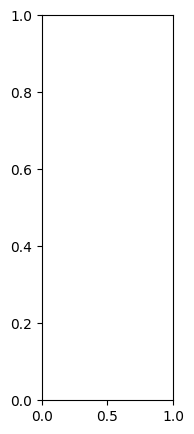

In [ ]:
# Take a look at the images
nsamples = 10
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt', 'Sneaker', 'Bag', 'Ankle boot']
imgs, labels = next(iter(train_loader))

fig = plt.figure(figsize=(20, 5), faccolor='w')
for i in range(nsamples):
  ax = plt.subplot(1, nsamples, i+1)
  plt.imshow(imgs[i, 0, :, :], vmin=0, vax=1.0, cmap=cm.gray)
  ax.set_title("{}".format(class_name[labels[i]]), fontsize=15)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()